1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0. 

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

In [11]:
from collections import Counter
import numpy as np

信息熵 $$Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i))$$

In [12]:
def entropy(elements):  #群体的混乱程度
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [13]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [14]:
import pandas as pd

In [15]:
dataset = pd.DataFrame.from_dict(mock_data)

In [16]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [7]:
#!pip install icecream

In [17]:
from icecream import ic

In [18]:
def find_the_min_spliter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [19]:
from sklearn import tree

In [19]:
X = [[1, 1, 1], [1, 0, 1], [1, 1, 2], [1, 1, 1], [0, 1, 1], [0, 1, 1], [0, 0, 2]]
Y = [1, 1, 1, 0, 0, 0, 1]
# X 和 Y 对应 dataset列表
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[0, 0, 1]])

array([0])

In [20]:
def predicate(gender, income, family_number):
    if gender == 'M':
        a = 0
    a=1
    if income == +10:
        b = 1
    b=0  
    return clf.predict([[a, b, family_number]])

In [21]:
predicate('M', -10, 1)

array([1])

别人写的：

In [20]:
# Restructure find_best_spliter function
def best_spliter(training_data, features, target: str) -> str:
    """Sort the features by salience (defined by entropy) and return the best feature in string
    Args:
        training_data: the training data (xi, yi)
        features: unused spliters
        target: the target feature or element of data
    Returns:
        the best feature of training data
    """
    spliters = list()
    
    for f in features:
        values = set(training_data[f])
        entropy_v = sum(entropy(training_data[training_data[f] == v][target].tolist()) for v in values)
        spliters.append([f, values, entropy_v])
    
    spliters.sort(key=lambda x:x[2])
    return spliters[0][0]

In [21]:
def decision_tree(training_data: pd.DataFrame, target:str, criterion=entropy):
    """Fit the data on decision model and return the predict function
    Args: 
        training_data: the data in pd.DataFrame structure
        target: the target column's title
        criterion: the function to sort the feature. Default is entropy I defined before
    Returns:
        predict function
    """
    features = set(training_data.columns.tolist()) - {target}
    
    def get_tree(data, features_unused):
        spliter = best_spliter(data, features_unused, target) # get the best spliter
        values = set(training_data[spliter])
        features_unused -= {spliter}
        return [spliter] + [get_details(spliter, value, data,features_unused) for value in values]
    
    def get_details(spliter, value, data, features_unused):
        entropy = criterion(data[data[spliter] == value][target].tolist())
        # entropy == 0, return the target value of this group
        if entropy == 0:
            return [value, entropy, data[data[spliter] == value][target].tolist()[0]]
        # entropy != 0, and no more spliters, return the highest probablity value
        if not features_unused:
            return [value, entropy, majority(data[data[spliter] == value][target].tolist())]
        # keep splitting
        return [value, entropy, get_tree(data[data[spliter] == value], features_unused)]
    
    def majority(data):
        count = dict()
        for v in data:
            if v not in count:
                count[v] = 1
            else:
                count[v] += 1
        return max(count, key=count.get)
    
    tree = get_tree(training_data, features)
    ic(tree)
    
    def predict_func(data):
        # search the tree until find the target value
        def next_node(data, tree):
            node = tree[0]
            for sub_tree in tree[1:]:
                if data[node] == sub_tree[0]:
                    if isinstance(sub_tree[2], int):
                        return sub_tree[2]
                    else:
                        return next_node(data, sub_tree[2])
        return next_node(data, tree)
    return predict_func

In [22]:
# Using the mock data in class
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [26]:
model = decision_tree(dataset, 'bought')

ic| tree: ['family_number',
           [1,
            0.6730116670092565,
            ['income',
             ['+10',
              0.5623351446188083,
              ['gender', ['M', -0.0, 0], ['F', 0.6931471805599453, 1]]],
             ['-10', -0.0, 1]]],
           [2, -0.0, 1]]


In [24]:
model({'gender': 'M', 'income': '-10', 'family_number': 1})

1

In [27]:
model

<function __main__.decision_tree.<locals>.predict_func(data)>

In [25]:
model({'gender': 'F', 'income': '+10', 'family_number': 2})

1

In [28]:
model({'gender': 'M', 'income': '+10', 'family_number': 1})

0

第二题

目标函数
$$ y = k*rm + b$$

In [29]:
#define target function  
def price(rm, k, b):
    return k * rm + b   

损失函数$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$
        $$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

In [58]:
# define loss function 
def loss(y,y_hat):  # y_hat为预测的y
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))  #zip()打包为元组的列表

In [31]:
from sklearn.datasets import load_boston
import random

In [32]:
dataset = load_boston() #载入数据

In [33]:
x,y=dataset['data'],dataset['target']

In [34]:
X_rm = x[:,5]

定义偏导数



$$ \frac{\partial{loss}}{\partial{k}} = 
             \begin{cases}
             -\frac{1}{n}\sum x_i ,\, y_i \geq  \hat{y_i} \\
             \frac{1}{n}\sum x_i ,\, y_i < \hat{y_i} \\
             \end{cases}
$$

$$ \frac{\partial{loss}}{\partial{b}} = 
             \begin{cases}
             -\frac{1}{n},\, y_i \geq  \hat{y_i} \\
             \frac{1}{n},\, y_i < \hat{y_i} \\
             \end{cases}
$$



In [35]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >=  y_hat_i:
            gradient += -x_i
        else:
            gradient += x_i
    return 1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >=  y_hat_i:
            return -1 / n 
        else:
            return 1 / n

In [73]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100   # random.random()产生 0 到 1 之间的随机浮点数
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-2

iteration_num = 1000
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 313.8621691131462, parameters k is -37.08914908861054 and b is -58.237621029136896
Iteration 1, the loss is 313.4671830564736, parameters k is -37.02630274473702 and b is -58.237601266291044
Iteration 2, the loss is 313.07219699980044, parameters k is -36.96345640086351 and b is -58.23758150344519
Iteration 3, the loss is 312.677210943128, parameters k is -36.90061005698999 and b is -58.23756174059934
Iteration 4, the loss is 312.28222488645537, parameters k is -36.83776371311647 and b is -58.23754197775349
Iteration 5, the loss is 311.88723882978235, parameters k is -36.77491736924296 and b is -58.237522214907635
Iteration 6, the loss is 311.4922527731098, parameters k is -36.71207102536944 and b is -58.23750245206178
Iteration 7, the loss is 311.0972667164372, parameters k is -36.64922468149592 and b is -58.23748268921593
Iteration 8, the loss is 310.7022806597647, parameters k is -36.586378337622406 and b is -58.23746292637008
Iteration 9, the loss is 310.30

Iteration 156, the loss is 252.24434427220655, parameters k is -27.28511944434193 and b is -58.234538025183944
Iteration 157, the loss is 251.84935821553387, parameters k is -27.222273100468414 and b is -58.23451826233809
Iteration 158, the loss is 251.45437215886113, parameters k is -27.159426756594897 and b is -58.23449849949224
Iteration 159, the loss is 251.05938610218854, parameters k is -27.09658041272138 and b is -58.23447873664639
Iteration 160, the loss is 250.66440004551595, parameters k is -27.033734068847863 and b is -58.234458973800535
Iteration 161, the loss is 250.26941398884307, parameters k is -26.970887724974347 and b is -58.23443921095468
Iteration 162, the loss is 249.87442793217053, parameters k is -26.90804138110083 and b is -58.23441944810883
Iteration 163, the loss is 249.47944187549763, parameters k is -26.845195037227313 and b is -58.23439968526298
Iteration 164, the loss is 249.08445581882515, parameters k is -26.782348693353796 and b is -58.234379922417126
I

Iteration 277, the loss is 204.45103141481098, parameters k is -19.680711835646406 and b is -58.23214672083582
Iteration 278, the loss is 204.0560453581382, parameters k is -19.61786549177289 and b is -58.23212695798997
Iteration 279, the loss is 203.6610593014654, parameters k is -19.555019147899372 and b is -58.23210719514412
Iteration 280, the loss is 203.26607324479303, parameters k is -19.492172804025856 and b is -58.232087432298265
Iteration 281, the loss is 202.87108718812019, parameters k is -19.42932646015234 and b is -58.23206766945241
Iteration 282, the loss is 202.47610113144722, parameters k is -19.366480116278822 and b is -58.23204790660656
Iteration 283, the loss is 202.08111507477486, parameters k is -19.303633772405306 and b is -58.23202814376071
Iteration 284, the loss is 201.68612901810215, parameters k is -19.24078742853179 and b is -58.232008380914856
Iteration 285, the loss is 201.29114296142956, parameters k is -19.177941084658272 and b is -58.231988618069
Iterat

Iteration 437, the loss is 141.25326234717957, parameters k is -9.625296815883548 and b is -58.22898466549946
Iteration 438, the loss is 140.85827629050658, parameters k is -9.56245047201003 and b is -58.22896490265361
Iteration 439, the loss is 140.4632902338341, parameters k is -9.499604128136511 and b is -58.228945139807756
Iteration 440, the loss is 140.0683041771613, parameters k is -9.436757784262992 and b is -58.228925376961904
Iteration 441, the loss is 139.67331812048863, parameters k is -9.373911440389474 and b is -58.22890561411605
Iteration 442, the loss is 139.27833206381595, parameters k is -9.311065096515955 and b is -58.2288858512702
Iteration 443, the loss is 138.88334600714313, parameters k is -9.248218752642437 and b is -58.22886608842435
Iteration 444, the loss is 138.48835995047045, parameters k is -9.185372408768918 and b is -58.228846325578495
Iteration 445, the loss is 138.09337389379783, parameters k is -9.1225260648954 and b is -58.22882656273264
Iteration 446

Iteration 533, the loss is 103.33460090660054, parameters k is -3.5920478040258312 and b is -58.227087432297644
Iteration 534, the loss is 102.93961484992784, parameters k is -3.529201460152313 and b is -58.22706766945179
Iteration 535, the loss is 102.54462879325514, parameters k is -3.466355116278795 and b is -58.22704790660594
Iteration 536, the loss is 102.14964273658241, parameters k is -3.403508772405277 and b is -58.22702814376009
Iteration 537, the loss is 101.75465667990966, parameters k is -3.340662428531759 and b is -58.227008380914235
Iteration 538, the loss is 101.35967062323697, parameters k is -3.277816084658241 and b is -58.22698861806838
Iteration 539, the loss is 100.96468456656434, parameters k is -3.214969740784723 and b is -58.22696885522253
Iteration 540, the loss is 100.56969850989158, parameters k is -3.152123396911205 and b is -58.22694909237668
Iteration 541, the loss is 100.17471245321897, parameters k is -3.0892770530376867 and b is -58.226929329530826
Itera

Iteration 642, the loss is 60.28112072927644, parameters k is 3.258203678187624 and b is -58.22493328209975
Iteration 643, the loss is 59.8861346726037, parameters k is 3.321050022061142 and b is -58.224913519253896
Iteration 644, the loss is 59.49114861593102, parameters k is 3.38389636593466 and b is -58.22489375640804
Iteration 645, the loss is 59.09616255925831, parameters k is 3.446742709808178 and b is -58.22487399356219
Iteration 646, the loss is 58.70117650258565, parameters k is 3.509589053681696 and b is -58.22485423071634
Iteration 647, the loss is 58.3061904459129, parameters k is 3.572435397555214 and b is -58.22483446787049
Iteration 648, the loss is 57.91120438924018, parameters k is 3.635281741428732 and b is -58.224814705024635
Iteration 649, the loss is 57.516218332567554, parameters k is 3.6981280853022502 and b is -58.22479494217878
Iteration 650, the loss is 57.12123227589479, parameters k is 3.7609744291757683 and b is -58.22477517933293
Iteration 651, the loss is

Iteration 761, the loss is 13.689797602432847, parameters k is 10.704700773049291 and b is -58.22258150344333
Iteration 762, the loss is 13.344134243701681, parameters k is 10.763492334314114 and b is -58.22256174059748
Iteration 763, the loss is 12.998938782069501, parameters k is 10.822283895578936 and b is -58.222541977751625
Iteration 764, the loss is 12.658643930157485, parameters k is 10.880813441033482 and b is -58.22252221490577
Iteration 765, the loss is 12.327973683584322, parameters k is 10.938315792812137 and b is -58.22250245205992
Iteration 766, the loss is 11.99769565176734, parameters k is 10.995818144590793 and b is -58.22248268921407
Iteration 767, the loss is 11.67496934166028, parameters k is 11.052821405460358 and b is -58.222462926368216
Iteration 768, the loss is 11.362243056603505, parameters k is 11.108821385697512 and b is -58.222443163522364
Iteration 769, the loss is 11.056433905112947, parameters k is 11.16430982443269 and b is -58.22242340067651
Iteration 

Iteration 898, the loss is 4.718652019111973, parameters k is 12.87222842127063 and b is -58.22370798565691
Iteration 899, the loss is 4.718651850113824, parameters k is 12.872143816527547 and b is -58.22372774850276
Iteration 900, the loss is 4.718653260728772, parameters k is 12.872059211784464 and b is -58.22374751134861
Iteration 901, the loss is 4.718653476753356, parameters k is 12.872206820480116 and b is -58.223767274194465
Iteration 902, the loss is 4.718653580559891, parameters k is 12.872122215737033 and b is -58.22378703704032
Iteration 903, the loss is 4.718655103392891, parameters k is 12.872269824432685 and b is -58.22380679988617
Iteration 904, the loss is 4.718654934394742, parameters k is 12.872185219689602 and b is -58.22382656273202
Iteration 905, the loss is 4.7186557741427055, parameters k is 12.872100614946518 and b is -58.223846325577874
Iteration 906, the loss is 4.718656561034283, parameters k is 12.87224822364217 and b is -58.223866088423726
Iteration 907, th

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

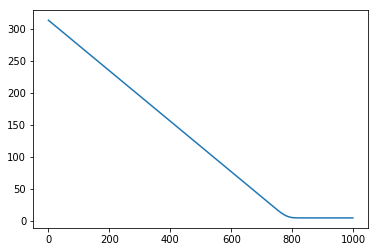

In [75]:
plt.plot(list(range(iteration_num)),losses)

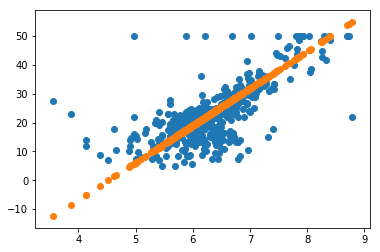

In [76]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)